# <span style="color:red">Open Hack Session</span>

## Today's Agenda
- Pitch your projects
- You can get help with programming questions
- etc.

Fill out the Google Doc using the following link: [https://docs.google.com/document/d/1qPpq-gBtX9d6wIDCV-F4bxv3SQmzxOSlfM5MT29Uue0/edit)


![ML](images/ml.png)



# In this notebook, we'll be tackling on how to get common Python Machine Learning (ML) packages installed (scikit-learn) and how to do a few ML techniques, such as:

# Supervised Learning:
* Decision Tree & Random Forrest Classifiers
* K-Neighbors Classification

# Un-Supervised Learning:
* K-Means Clustering
* Principal Component Analysis (PCA)





# Setting up a Virtual Environment for fresh installations:

## Some ML tools (like Tensorflow/Keras) may or may not work on M1/M2 chipped macbooks due to how the newer machines handle their GPUs. For this reason, it's best to use a virtual enviroment to get fresh installations for stable versions of code:


# To do so, we'll create a virtual environment with conda and we'll call it "ML" for short. Also, we'll use Python 3.9.13.

```bash
conda create -n ML python=3.9.13
```

## To activate the virtual environment we use:
```bash
conda activate ML
```

## To deactivate, use:
```bash
conda deactivate
``` 

## Once the virtual environment is activated, it's time to add some fresh installations
```bash
pip install -U scikit-learn  
```

```bash
conda install pytorch::pytorch torchvision torchaudio -c pytorch
```

```bash
pip install tensorflow
```

```bash
pip install tqdm 
```

```bash
pip install matplotlib pandas seaborn
```

```bash
pip install scikeras
```

```bash
pip install --user ipykernel
```

## Next, we can add our virtual environment to our Jupyter Notebooks with the command:
```bash
python -m ipykernel install --user --name=ML
```
## After this step, you should be able to switch Kernels from the default Python installation from conda to your new virtual environement titled "ML"

# For this example, we'll use the Iris data set from seaborn
![image](images/iris.png)

['setosa' 'versicolor' 'virginica'] ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


/Users/daxfeliz/opt/anaconda3/envs/ML/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


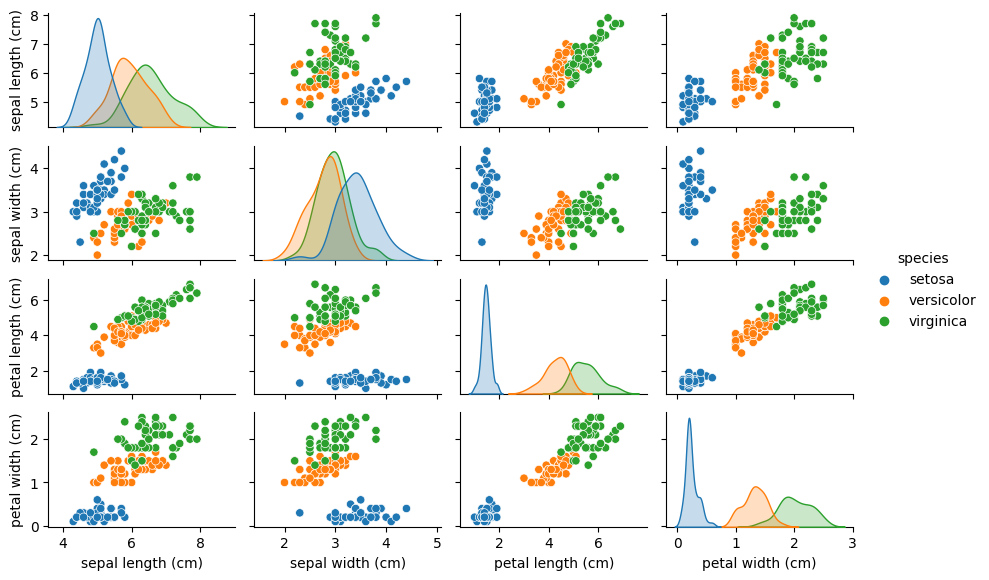

In [79]:
import seaborn as sns
iris2 = sns.load_dataset("iris")


# Load Data
import sklearn
iris = sklearn.datasets.load_iris()
print(iris.target_names,iris.feature_names)




# Create a dataframe
df= pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target
df['species'] = iris2.species
iris = df


iris2 = iris2.rename(columns={'sepal_length':'sepal length (cm)','sepal_width':'sepal width (cm)',
                             'petal_length':'petal length (cm)','petal_width':'petal width (cm)'})

iris3 = iris.merge(iris2,how='inner')


# rename to be just iris
iris = iris3





p=sns.pairplot(data=iris[['sepal length (cm)','sepal width (cm)',
                           'petal length (cm)','petal width (cm)','species']] # exclude target column
               ,  hue='species')
p.fig.set_size_inches(10,6)
p.tight_layout(pad=1)

iris.head()

# Supervised Learning: Decision Tree Classifiers vs Random Forest Classifiers

## Decision Tree Classifier:
Decision Tree is a Supervised Machine Learning Algorithm that uses a set of rules to make decisions, similarly to how humans make decisions.


## Random Forest Classifier:
It builds decision trees on different samples and takes their majority vote for classification and average in case of regression. It leverages an ensemble of multiple decision trees to generate predictions or classifications. By combining the outputs of these trees, the random forest algorithm delivers a consolidated and more accurate result.

## The main difference?
A decision tree combines some decisions, whereas a random forest combines several decision trees. Thus, it is a long process, yet slow. Whereas, a decision tree is fast and operates easily on large data sets, especially the linear one. The random forest model needs rigorous training.

![image](images/dt_vs_rf.png)

# Supervised Learning: Example of Decision Tree Classifier with sklearn

In [115]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
targets = np.unique(iris.species)

# Prepare training data for building the model
X_train = iris.drop(['target','species'], axis=1) #just the numerical data of lengths/widths
y_train = iris['target']

# Instantiate the model
cls = DecisionTreeClassifier()

# Train/Fit the model 
clf=cls.fit(X_train, y_train)

# Make prediction using the model given some input parameters
sepal_length_pred, sepal_width_pred, petal_length_pred, petal_width_pred = 5.1, 3.2, 1.5, 0.5
X_pred = [sepal_length_pred, sepal_width_pred, petal_length_pred, petal_width_pred]
y_pred = cls.predict([X_pred])

# The Decision Tree will try to use the information available to predict what the likely species is

print("Prediction is likely: {}".format(targets[y_pred]))

# How good is this prediction?

from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf,X_train, y_train,cv=10,verbose=0)
print('Decision Tree Classifier has a'+" %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))





Prediction is likely: ['setosa']
Decision Tree Classifier has a 0.96 accuracy with a standard deviation of 0.04


/Users/daxfeliz/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Supervised Learning: Example of Random Forest Classifier with sklearn

In [122]:
from sklearn.ensemble import RandomForestClassifier

# Prepare training data for building the model
X_train = iris.drop(['target','species'], axis=1) #just the numerical data of lengths/widths
y_train = iris['target']

# Instantiate the model
cls = RandomForestClassifier()

# Train/Fit the model 
clf=cls.fit(X_train, y_train)


# Make prediction using the model given some input parameters
sepal_length_pred, sepal_width_pred, petal_length_pred, petal_width_pred = 5.1, 3.2, 1.5, 0.5
X_pred = [sepal_length_pred, sepal_width_pred, petal_length_pred, petal_width_pred]
y_pred = cls.predict([X_pred])

# The Decision Tree will try to use the information available to predict what the likely species is

print("Prediction is likely: {}".format(targets[y_pred]))

# How good is this prediction?

from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf,X_train, y_train,cv=10,verbose=0)
print('Random Forest Classifier has a'+" %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))





/Users/daxfeliz/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Prediction is likely: ['setosa']
Random Forest Classifier has a 0.95 accuracy with a standard deviation of 0.05


# Supervised Learning: Example of K Nearest Neighbors classifier with sklearn


The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

/Users/daxfeliz/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Prediction is likely: ['setosa']
Random Forest Classifier has a 0.97 accuracy with a standard deviation of 0.06


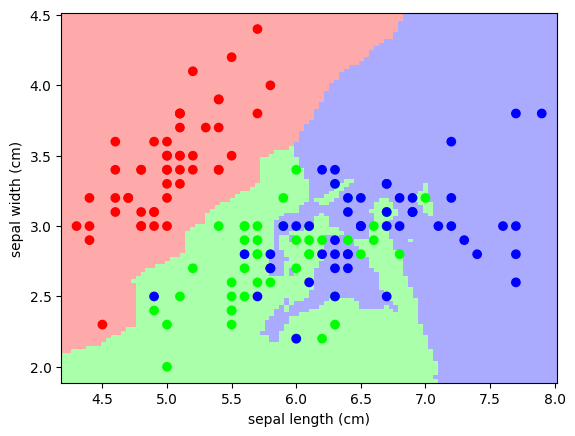

In [150]:
from sklearn.neighbors import KNeighborsClassifier

# Prepare training data for building the model
X_train = iris.drop(['target','species'], axis=1) #just the numerical data of lengths/widths
y_train = iris['target']

# Instantiate the model
# Instantiate the model
cls = KNeighborsClassifier(n_neighbors=3)

# Train/Fit the model 
clf=cls.fit(X_train, y_train)


# Make prediction using the model given some input parameters
sepal_length_pred, sepal_width_pred, petal_length_pred, petal_width_pred = 5.1, 3.2, 1.5, 0.5
X_pred = [sepal_length_pred, sepal_width_pred, petal_length_pred, petal_width_pred]
y_pred = cls.predict([X_pred])

# The Decision Tree will try to use the information available to predict what the likely species is

print("Prediction is likely: {}".format(targets[y_pred]))

# How good is this prediction?

from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf,X_train, y_train,cv=10,verbose=0)
print('Random Forest Classifier has a'+" %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))



def plot_iris_knn():
    from matplotlib.colors import ListedColormap
    # Create color maps for 3-class classification problem, as with iris
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    iris = sklearn.datasets.load_iris() #same data set, just formated slightly different
    X = iris.data[:, :2]  # we only take the first two features.
    y = iris.target

    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
    knn.fit(X, y)

    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlabel('sepal length (cm)')
    plt.ylabel('sepal width (cm)')
    plt.axis('tight')
    plt.show()
plot_iris_knn()

# Un-Supervised Learning: K-Means Clustering

K-Means clustering works by constantly trying to find a centroid with closely held data points. This means that each cluster will have a centroid and the data points in each cluster will be closer to its centroid compared to the other centroids.

/Users/daxfeliz/opt/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


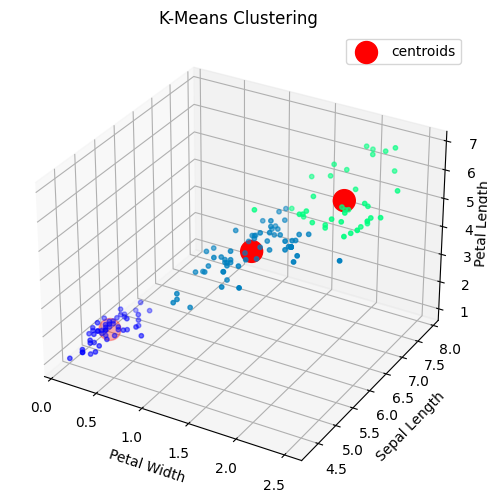

In [176]:
from sklearn.cluster import KMeans
X = iris.drop(['target','species'], axis=1) #just the numerical data of lengths/widths

# Instantiate Kmeans
km = KMeans(3)
clusts = km.fit_predict(X)

#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(km.cluster_centers_[:, 3],
            km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 2],
            s = 250,
            marker='o',
            c='red',
            label='centroids')
scatter = ax.scatter(iris['petal width (cm)'],iris['sepal length (cm)'], iris['petal length (cm)'],
                     c=clusts,s=10, cmap='winter',zorder=-10)


ax.set_title('K-Means Clustering')
ax.set_xlabel('Petal Width')
ax.set_ylabel('Sepal Length')
ax.set_zlabel('Petal Length')
ax.zaxis.labelpad=-3# z axis label disappears without this for some reason...
ax.legend()
fig.tight_layout(pad=0)
plt.show()

# Un-Supervised Learning: Principal Component Analysis

Principal Component Analysis (PCA) finds a way to reduce the dimensions of your data by projecting it onto lines drawn through your data, starting with the line that goes through the data in the direction of the greatest variance. This is calculated by looking at the eigenvectors (sometimes called Explained Variance) of the covariance matrix.

Shape before PCA:  (152, 4)
Shape after PCA:  (152, 3)


/var/folders/qb/9tctyb8566b3ws5ypfbmqq8r0000gn/T/ipykernel_77331/2882234453.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout(pad=0)


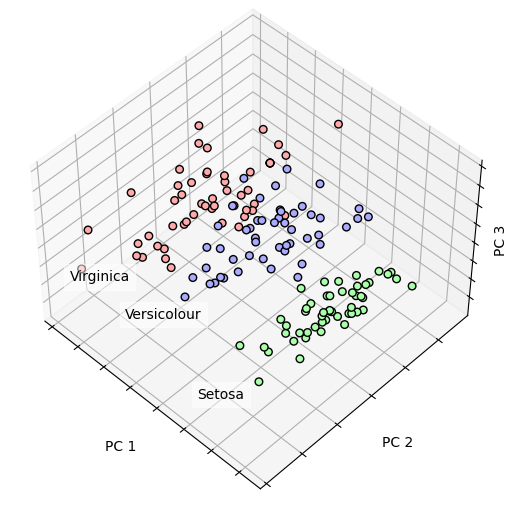

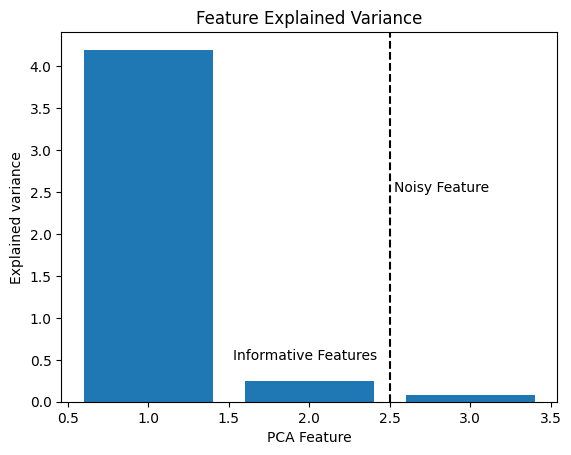

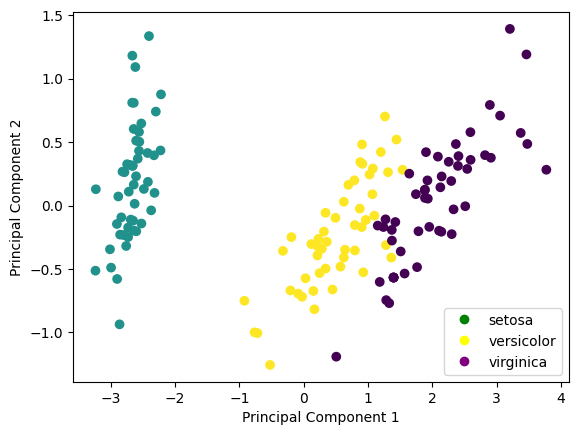

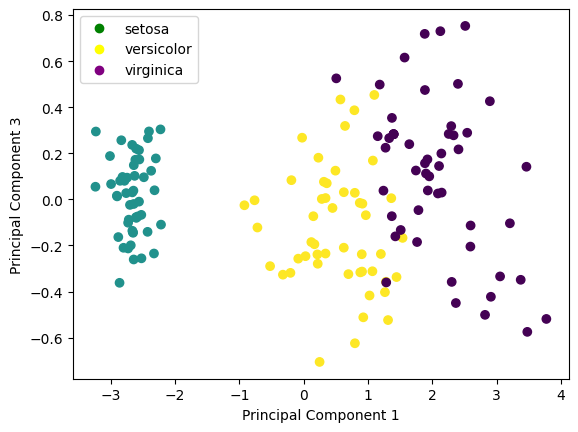

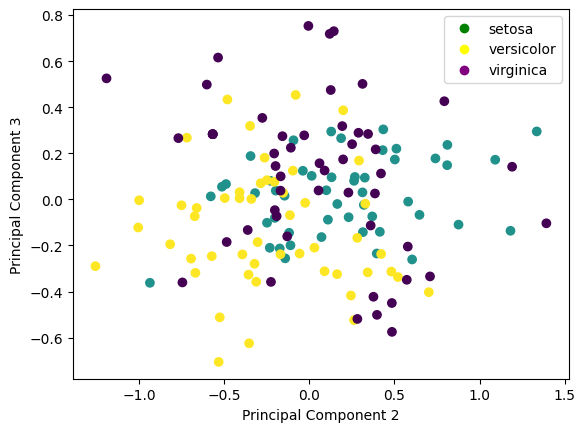

,PC1,PC2,PC3,target
0,-2.703657,0.320040,-0.023939,setosa
1,-2.732587,-0.173903,-0.213172,setosa
2,-2.907212,-0.145421,0.015910,setosa
3,-2.763074,-0.318598,0.027164,setosa
4,-2.748106,0.325666,0.094267,setosa


In [264]:

from sklearn.decomposition import PCA

X_orig = iris.drop(['target','species'], axis=1) #just the numerical data of lengths/widths
y = iris['target']

pca = PCA(n_components=3)
pca_features = pca.fit_transform(X)
X = pca.transform(X)

 
print('Shape before PCA: ', X_orig.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3'])

#map target names to Principal Components
target_names = {
    0:'setosa',
    1:'versicolor', 
    2:'virginica'
}
 
pca_df['target'] = y
pca_df['target'] = pca_df['target'].map(target_names)



fig = plt.figure()
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)

from matplotlib.colors import ListedColormap
# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=cmap_light, edgecolor="k",alpha=1,s=30)

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3',rotation=90)
ax.zaxis.labelpad=-10# z axis label disappears without this for some reason...
fig.tight_layout(pad=0)

plt.show()


# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_)
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.text(x=1.525,y=0.5,s='Informative Features')
plt.axvline(x=2.5,linestyle='--',color='black');plt.text(x=2.525,y=2.5,s='Noisy Feature')
plt.show()


plt.scatter(pca_df['PC1'],pca_df['PC2'],c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
labels = np.unique(y)
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in labels]
legend=plt.legend(handles, np.unique(pca_df['target']))
legend.legend_handles[0].set_color('green')
legend.legend_handles[1].set_color('yellow')
legend.legend_handles[2].set_color('purple')
plt.show()

plt.scatter(pca_df['PC1'],pca_df['PC3'],c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 3')
labels = np.unique(y)
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in labels]
legend=plt.legend(handles, np.unique(pca_df['target']))
legend.legend_handles[0].set_color('green')
legend.legend_handles[1].set_color('yellow')
legend.legend_handles[2].set_color('purple')
plt.show()

plt.scatter(pca_df['PC2'],pca_df['PC3'],c=y)
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
labels = np.unique(y)
handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in labels]
legend=plt.legend(handles, np.unique(pca_df['target']))
legend.legend_handles[0].set_color('green')
legend.legend_handles[1].set_color('yellow')
legend.legend_handles[2].set_color('purple')
plt.show()

pca_df.head() 


# Example of Linear Regression with Pytorch:


In [269]:
  # Imports
import numbers
import tqdm
import numpy as np
import matplotlib.pylab as plt
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader

# device-agostic notebook
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
    


## I) A Long Short-Term Memory Network to Model Astronomical Time Series with missing values

This section aims at presenting and experimenting with simple tool: an LSTM architecture slightly tweaked for imputing missing values in dataset of time series, opening various applications for datasets of astronomical time series. 


Let's first define a dummy dataset made of the (additive) composition of a random walk and a sine with random offset and period.

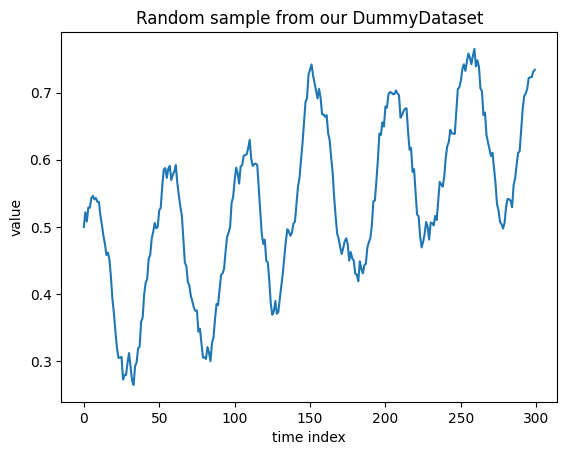

In [270]:
class DummyDataset(torch.utils.data.Dataset):
  """A simple torch dataset combining random walk and sine processes"""
  def __init__(self, seq_length, size=100, seed=None):
    """Define a DummyDataset object
    
    Args:
      seq_length: int
        lenght of the time series to generate
      size: int
        number of samples for the dataset
      seed: int
        manual seed to define for reproducibility (default None)
    """
    super().__init__()
    self.seq_length = seq_length
    self.size = size
    if seed is not None:
      torch.manual_seed(seed)
    
  def __len__(self):
    return self.size
    
  def __getitem__(self, index):
    sine = torch.sin(torch.linspace(0, 50 * torch.rand(1).item(), self.seq_length) 
                     + torch.rand(1).item() * np.pi)
    random_walk = (torch.rand(self.seq_length) - 0.5).cumsum(0)/3
    out = (sine + random_walk).unsqueeze(-1)
    out = ((out - out[:1].repeat(self.seq_length, 1)) / 2                         # normalisation
           / (out.max(0, keepdims=True)[0] - out.min(0, keepdims=True)[0]) + 0.5)  
    return out

item = DummyDataset(seq_length=300, size=100)[0]     
plt.figure()   
plt.plot(item)
plt.xlabel('time index')
plt.ylabel('value')
plt.title('Random sample from our DummyDataset')
plt.show()


# Create train a test dummy datasets
seq_length = 200
batch_size = 64

dataset = DummyDataset(seq_length, size=256, seed=0)
dataset_test = DummyDataset(seq_length, size=64, seed=1)

loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
loader_test = DataLoader(dataset_test, batch_size=len(dataset_test), shuffle=False)
batch_test = next(iter(loader_test)).to(device)

### Simple forecasting LSTM
Now let's teach first a basic stacked LSTM to forecast the next step in this dataset

  0%|                                                   | 0/200 [00:00<?, ?it/s]/var/folders/qb/9tctyb8566b3ws5ypfbmqq8r0000gn/T/ipykernel_77331/2809226893.py:9: UserWarning: Using a target size (torch.Size([64, 199, 32])) that is different to the input size (torch.Size([64, 199, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  criterion = lambda y, pred: F.mse_loss(y[:,1:], pred[:, :-1]) # x_{t+1} ~ f(x_t)
100%|█████████████████████████████████████████| 200/200 [00:41<00:00,  4.88it/s]


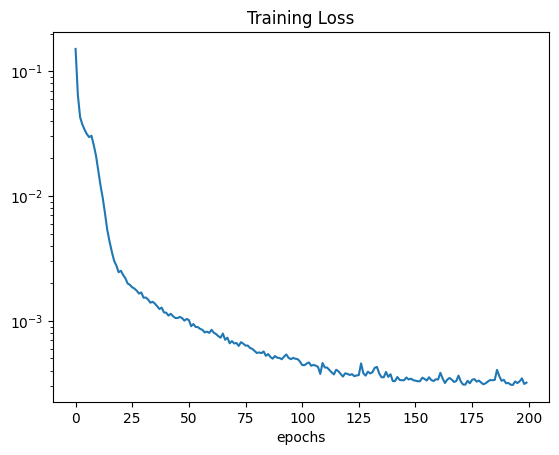

In [272]:
hidden_size = 32
num_layers = 2

model = nn.LSTM(input_size=1, hidden_size=hidden_size, num_layers=num_layers, 
                batch_first=True)   # Define stacked LSTM model

model = model.to(device)   # Convert to appropriate device
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = lambda y, pred: F.mse_loss(y[:,1:], pred[:, :-1]) # x_{t+1} ~ f(x_t)

def train_forecaster(model, loader, optimiser, criterion, epochs=1, device=None):
  """Train a basic forecasting pytorch RNN"""
  model.train()
  losses = []

  for epoch in tqdm.tqdm(range(1, 1+epochs)):
    epoch_loss = 0
    for x in loader:
      x = x.to(device)
      optimiser.zero_grad()
      with torch.enable_grad():
        pred, _ = model(x)   # forward pass
        loss = criterion(x, pred)      # loss computation (order matters!)
      loss.backward()              # gradients computation
      optimiser.step()               # updating networks weights
      epoch_loss += loss.item()
    losses.append(epoch_loss / len(loader))
  return losses  



losses = train_forecaster(model, loader, optimiser, criterion, epochs=200, 
                          device=device)
plt.plot(losses)
plt.xlabel('epochs')
plt.yscale('log')
plt.title('Training Loss')
plt.show()

/var/folders/qb/9tctyb8566b3ws5ypfbmqq8r0000gn/T/ipykernel_77331/190085176.py:7: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1682343673238/work/aten/src/ATen/native/TensorShape.cpp:3575.)
  plt.plot(batch_test[i,1:,0].detach().cpu().T)


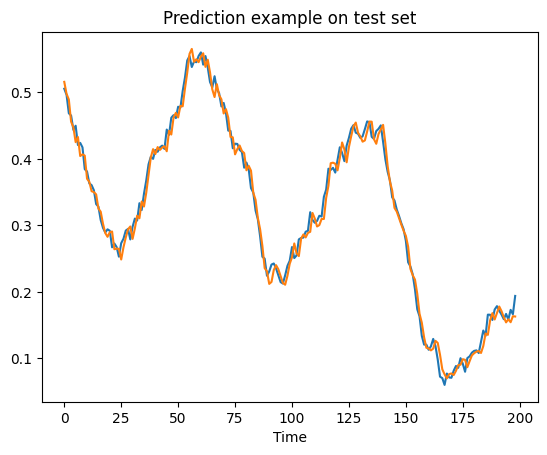

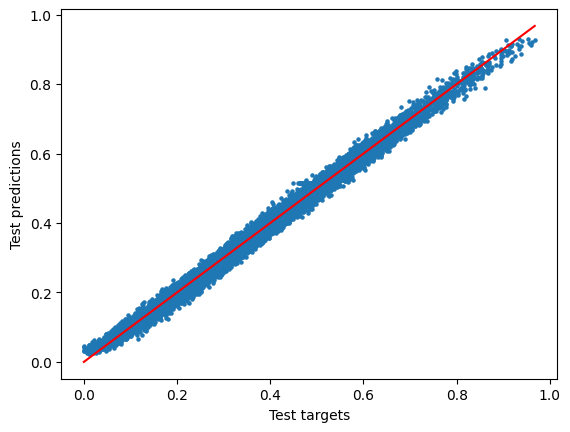

In [273]:
model.eval()
pred, (h_n, c_n) = model(batch_test)

i = np.random.randint(len(pred))
plt.title('Prediction example on test set')
plt.xlabel('Time')
plt.plot(batch_test[i,1:,0].detach().cpu().T) 
plt.plot(pred[i,:-1,0].detach().cpu().T)
plt.show()

plt.scatter(batch_test[:, 1:,0].cpu().detach(), pred[:,:-1,0].detach().cpu(), s=5)
plt.plot([batch_test.min().item(), batch_test.max().item()], 
         [batch_test.min().item(), batch_test.max().item()], color='red',)
plt.ylabel('Test predictions')
plt.xlabel('Test targets')
plt.show()

In [274]:
class LSTMI(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=None, num_layers=1):
        """Define an LSTM Imputer network

        Args:
          input_size: dimensionality of the input sequences
          hidden_size: Number of units for the LSTM cells
          output_size: dimensionality of the output sequences.
                       If default (None) will be set as input_size.
          num_layers: number of LSTM layers
        Returns:
          pytorch module 

        author: Mario Morvan
        """
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size if output_size is not None else input_size
        self.num_layers = num_layers

        self.lstm_cells = nn.ModuleList([nn.LSTMCell(input_size=self.input_size, hidden_size=self.hidden_size)])
        self.lstm_cells.extend([nn.LSTMCell(input_size=self.hidden_size, hidden_size=self.hidden_size)
                                for _ in range(self.num_layers - 1)])

        self.fc = nn.Linear(self.hidden_size, self.output_size)

        self.h_t = None
        self.c_t = None
        self.out_t = None

    def init_state(self, batch_size, device=None, dtype=None):
      """Initialise the network's states"""
      self.h_t = [torch.randn(batch_size, self.hidden_size, device=device, dtype=dtype)
                  for _ in range(self.num_layers)]
      self.c_t = [torch.randn(batch_size, self.hidden_size, device=device, dtype=dtype)
                  for _ in range(self.num_layers)]
      self.out_t = torch.randn(batch_size, self.output_size, device=device, dtype=dtype)

    def init_state_like(self, x):
      """Initialise the network's on the model of a given input"""
      self.init_state(len(x), x.device, x.dtype)

    def forward(self, x, z=None, m=None, mask_nans=True):
      """Performs a forward pass

      :param x: Input vector
      :param z: covariate data
      :param m: Imputation mask - 1/True for keeping input and 0/False for forcing dynamic imputation
      :return: Output vector with imputed values
      """

      # Checking - casting inputs
      if m is not None:
        if x.shape != m.shape:
          mess = f'x and m must have the same shape ({x.shape} != {m.shape})'
          raise RuntimeError(mess)
      else:
        m = torch.ones_like(x)

      # infer a mask from the missing values
      if mask_nans:
        m *= (x == x)
        x[x!=x] = 0

      if len(x.shape) == 2:
        warnings.warn('input has only 2 dims')
        x = x.unsqueeze(-1)
        m = m.unsqueeze(-1)
      elif len(x.shape) != 3:
        print(x.shape)
        raise ValueError('wrong shape')

      batch_size, len_seq, n_dim = x.shape

      if z is not None:
        zdim = z.shape[-1]
      else:
        zdim = 0
      if n_dim + zdim != self.input_size:
        mess = f'input (dim={n_dim}) and covariate (dim={zdim}) dimensions must' \
                + f'add to input_size param ({self.input_size})'
        raise RuntimeError(mess)

      m = m.type(x.dtype)
      inverted_m = (torch.ones_like(m, device=x.device) - m)

      # Preparing input
      if z is not None:
        input_masked = torch.cat((x * m, z), dim=-1)
      else:
        input_masked = x * m
      outputs = []

      for t in range(len_seq):
        pred_t = self.out_t
        input_t = input_masked[:, t] + F.pad(pred_t * inverted_m[:, t], (0, zdim))
        for k, lstm_cell in enumerate(self.lstm_cells):
          if k == 0:
            self.h_t[0], self.c_t[0] = lstm_cell(input_t, (self.h_t[0], self.c_t[0]))
          else:
            self.h_t[k], self.c_t[k] = lstm_cell(self.h_t[k - 1], (self.h_t[k], self.c_t[k]))
        self.out_t = self.fc(self.h_t[-1])
        outputs.append(self.out_t.unsqueeze(1))
      return torch.cat(outputs, 1)

def train_lstmi(model, loader, optimiser, criterion, epochs=1, device=device):
  """Train a LSTMI module"""
  model.train()
  losses = []

  for epoch in tqdm.tqdm(range(1, 1+epochs)):
    epoch_loss = 0
    for x in loader:
      optimiser.zero_grad()
      x = x.to(device)
      model.init_state_like(x) ## Addition
      with torch.enable_grad():
        pred = model(x)
        loss = criterion(x, pred)   # x_{t+1} ~ f(x_t)
      loss.backward()
      optimiser.step()
      epoch_loss += loss.item()
    losses.append(epoch_loss / len(loader))
  return losses  

100%|█████████████████████████████████████████| 100/100 [00:25<00:00,  3.92it/s]


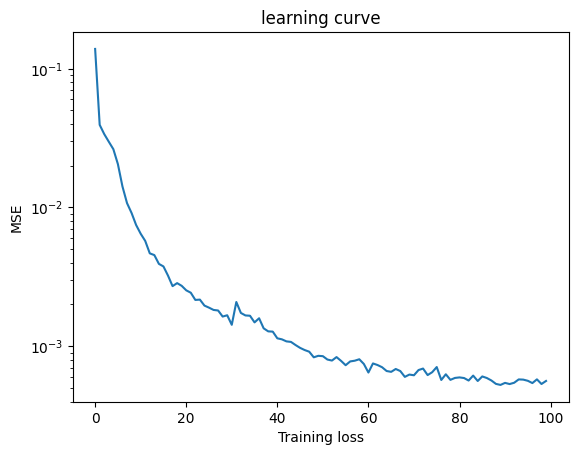

In [275]:

model = LSTMI(input_size=1, hidden_size=hidden_size, num_layers=num_layers)
model = model.to(device)
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = lambda y, pred: F.mse_loss(y[:, 1:], pred[:, :-1])
losses = train_lstmi(model, loader, optimiser, criterion, epochs=100)

# learning curve
plt.plot(losses)
plt.yscale('log')
plt.title('learning curve')
plt.xlabel('Training loss')
plt.ylabel('MSE')
plt.show()

# Now let's see how the model predicts on time series with missing inputs.

**Select a mask rate** by entering a value between 0 (no masking) and 1 (all inputs masked).

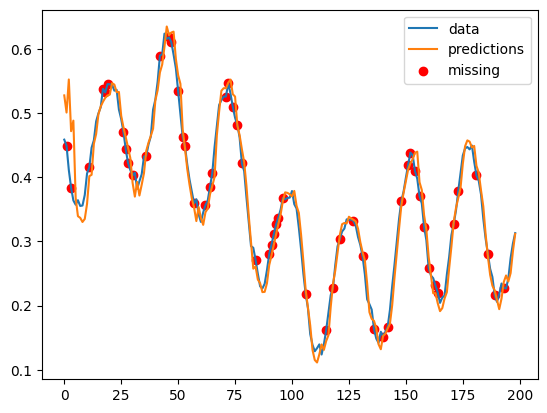

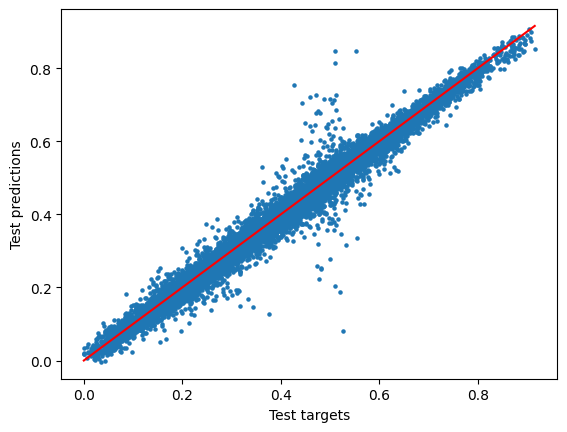

In [276]:
#@title Select an input mask rate
masking_rate = 0.3 #@param {type:"number"}

batch_test = next(iter(loader))
batch_test_masked = batch_test.clone()
mask = torch.rand_like(batch_test) <  masking_rate
batch_test_masked[mask] = np.nan


model.eval()
model.init_state_like(batch_test_masked.to(device))
pred = model(batch_test_masked.to(device)).cpu()

i = np.random.randint(len(pred))
plt.plot(batch_test[i,1:,0].detach().cpu().T, label='data')
plt.plot(pred[i,:-1,0].detach().T, label='predictions')
plt.scatter(np.where((mask[i,1:,0]).detach().to('cpu'))[0],
            batch_test[i,1:,0][mask[i,1:,0]].detach().cpu(), 
            color='red', label='missing')
plt.legend()
plt.show() 

plt.scatter(batch_test[:, 1:,0].detach().cpu(), pred[:,:-1,0].detach().cpu(), s=5)
plt.plot([batch_test.min().item(), batch_test.max().item()], 
         [batch_test.min().item(), batch_test.max().item()], color='red')
plt.ylabel('Test predictions')
plt.xlabel('Test targets')
plt.show()

# Other packages that can be used for Machine Learning:
* Tensorflow (Note: This one may be tricky to get working for M1/M2 chipped Macbooks. You should use a Virtual Environment)
* Pytorch